### hybrid role-based + ML
(derive: 'Kumpulan Umur', #'Umur', 'Kalori', #'Negeri', #'Strata'): **FPLI** + 

('Negeri', 'Strata', 'p_cloth', 'p_rent', 'p_durable', 'p_transport', 'p_other'): NFPLI

suggestion vars: ['umur', 'state', 'strata', 'hh_size', 'ginc_ind' ### 'adjpli'] --> **modified_PLI**(derive) 

(<PLI == status: Miskin Tegar) +

**modified_PLI** + other vars 

('ginc_ind', 'hh_size', 'special_need', 'tarafkahwin', 'etnik', 'statuskerja', 'sector', 'educ' ### 'status')

In [1]:
# del df

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('potentialID_HIS2022v7.csv')
df.head(3)


,HID,Nama,J,U,state,NGDP,Mukim,strata,age_g,hh_size,...,Bayi,Kanak2,bil_OKU,RS,TP,OKU,POKU,adjpli,age_gnew,gender
0,14701108050190260004010601,ANIAH BINTI JALI,2,72.0,Perak,Kuala Kangsar,Chegar Galah,Luar Bandar,65 tahun dan ke atas,1 orang,...,0.0,0.0,0.0,0,3,8,3,791.8615,≥60 tahun,Perempuan
1,02103112090160100004000401,MAJIKON BIN MENGAIT,1,51.0,Sabah,Kota Belud,Kota Belud,Luar Bandar,45-64 tahun,1 orang,...,0.0,0.0,0.0,0,3,8,3,808.3728,30-59 tahun,Lelaki
2,20903208050820330002001401,AMIDAH BT HJ ABD KADIR,2,70.0,Perak,Kuala Kangsar,Sungai Siput,Bandar,65 tahun dan ke atas,1 orang,...,0.0,0.0,1.0,0,3,2,3,917.5272,≥60 tahun,Perempuan


In [14]:
df.columns.to_list()

['HID',
 'Nama',
 'J',
 'U',
 'state',
 'NGDP',
 'Mukim',
 'strata',
 'age_g',
 'hh_size',
 'ginc_hh',
 'ginc_ind',
 'disp_ind',
 'disp_hh',
 'mutlak',
 'tegar',
 'Bumi_1',
 'act_status',
 'sector1',
 'educ',
 'old_cit',
 'Bayi',
 'Kanak2',
 'bil_OKU',
 'RS',
 'TP',
 'OKU',
 'POKU',
 'adjpli',
 'age_gnew',
 'gender']

In [15]:
df2 = df[['HID', 'J', 'U', 'state', 'NGDP', 'strata', 'hh_size', 'ginc_hh', 'ginc_ind','TP']]

In [16]:
df2[(df2['ginc_hh'] != 0) | (df2['ginc_hh'].notnull())]


,HID,J,U,state,NGDP,strata,hh_size,ginc_hh,ginc_ind,TP
0,14701108050190260004010601,2,72.0,Perak,Kuala Kangsar,Luar Bandar,1 orang,365.00000,365.00000,3
1,02103112090160100004000401,1,51.0,Sabah,Kota Belud,Luar Bandar,1 orang,451.16666,451.16666,3
2,20903208050820330002001401,2,70.0,Perak,Kuala Kangsar,Bandar,1 orang,500.50000,500.50000,3
3,21103208020700100003005801,2,66.0,Perak,Manjung,Luar Bandar,1 orang,502.16666,502.16666,3
4,08603102040350270001001201,1,68.0,Kedah,Kuala Muda,Bandar,1 orang,525.00000,525.00000,3
...,...,...,...,...,...,...,...,...,...,...
38408,41703110051530010001010001,1,74.0,Selangor,Petaling,Bandar,4 orang,96963.25000,81313.66400,2
38409,20401208080310680004007001,1,65.0,Perak,Hulu Perak,Luar Bandar,2 orang,103867.66400,99518.08600,2
38410,40106110050830830001002101,1,42.0,Selangor,Petaling,Bandar,1 orang,107635.75000,107635.75000,1
38411,10104101020410010001000901,2,41.0,Johor,Johor Bahru,Bandar,6 orang dan lebih,120887.50000,120887.50000,2


C:\Users\najmi.ariffin\AppData\Local\Temp\2\ipykernel_79300\350328275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ginc_hh_bins'] = pd.cut(df2['ginc_hh'], bins=bins, right=False)


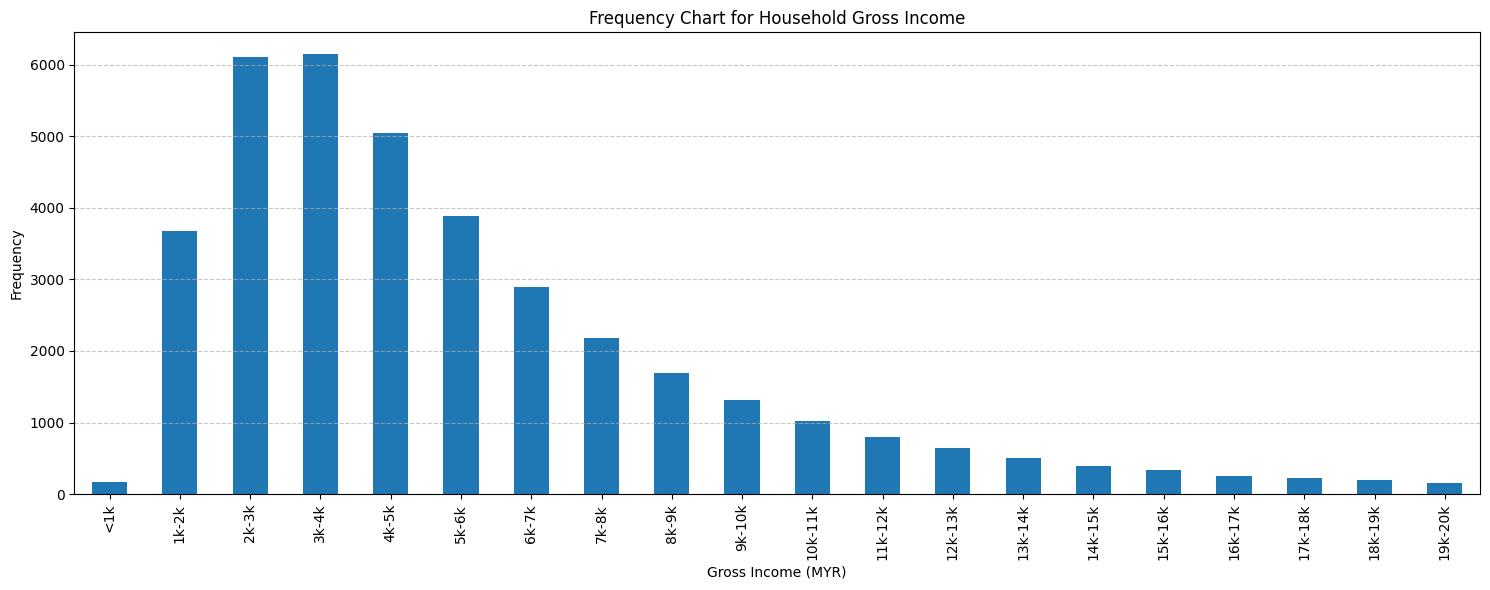

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the maximum value of ginc_hh for defining the bin range
max_income = int(df2['ginc_hh'].max())  # Convert to integer

# Create bins with intervals of every 1000 MYR up to 40k
bins = range(0, 21000, 1000)  # Adjusted to go up to 40k

# Categorize 'ginc_hh' values into bins
df2['ginc_hh_bins'] = pd.cut(df2['ginc_hh'], bins=bins, right=False)

# Define custom labels
labels = ['<1k'] + [f"{i}k-{i+1}k" for i in range(1, 20)]  # Adjusted labels

# Count the frequency of each bin
ginc_hh_freq = df2['ginc_hh_bins'].value_counts().sort_index()

# Plot the frequency chart
plt.figure(figsize=(15, 6))
ginc_hh_freq.plot(kind='bar')
plt.title('Frequency Chart for Household Gross Income')
plt.xlabel('Gross Income (MYR)')
plt.ylabel('Frequency')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\najmi.ariffin\AppData\Local\Temp\2\ipykernel_79300\3257064949.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ginc_ind_bins'] = pd.cut(df2['ginc_ind'], bins=bins, right=False)


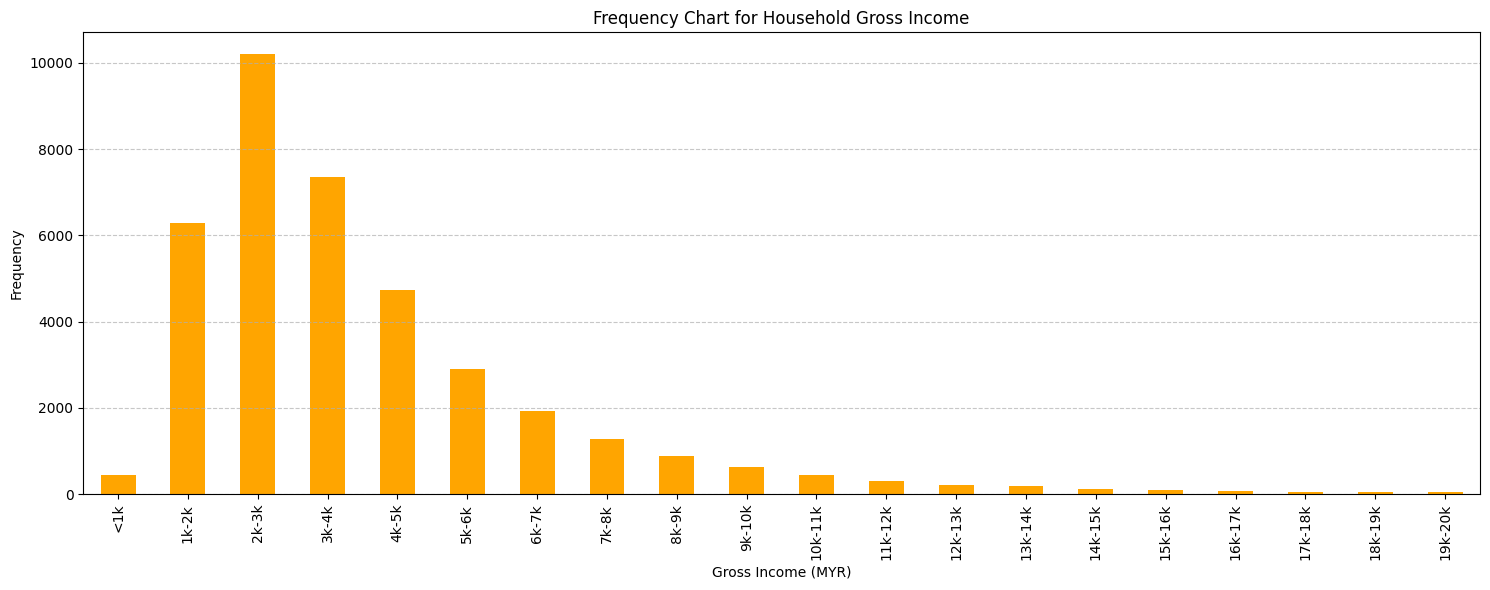

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the maximum value of ginc_hh for defining the bin range
max_income = int(df2['ginc_ind'].max())  # Convert to integer

# Create bins with intervals of every 1000 MYR up to 40k
bins = range(0, 21000, 1000)  # Adjusted to go up to 40k

# Categorize 'ginc_hh' values into bins
df2['ginc_ind_bins'] = pd.cut(df2['ginc_ind'], bins=bins, right=False)

# Define custom labels
labels = ['<1k'] + [f"{i}k-{i+1}k" for i in range(1, 20)]  # Adjusted labels

# Count the frequency of each bin
ginc_hh_freq = df2['ginc_ind_bins'].value_counts().sort_index()

# Plot the frequency chart with orange color
plt.figure(figsize=(15, 6))
ginc_hh_freq.plot(kind='bar', color='orange')  # Using orange color
plt.title('Frequency Chart for Household Gross Income')
plt.xlabel('Gross Income (MYR)')
plt.ylabel('Frequency')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


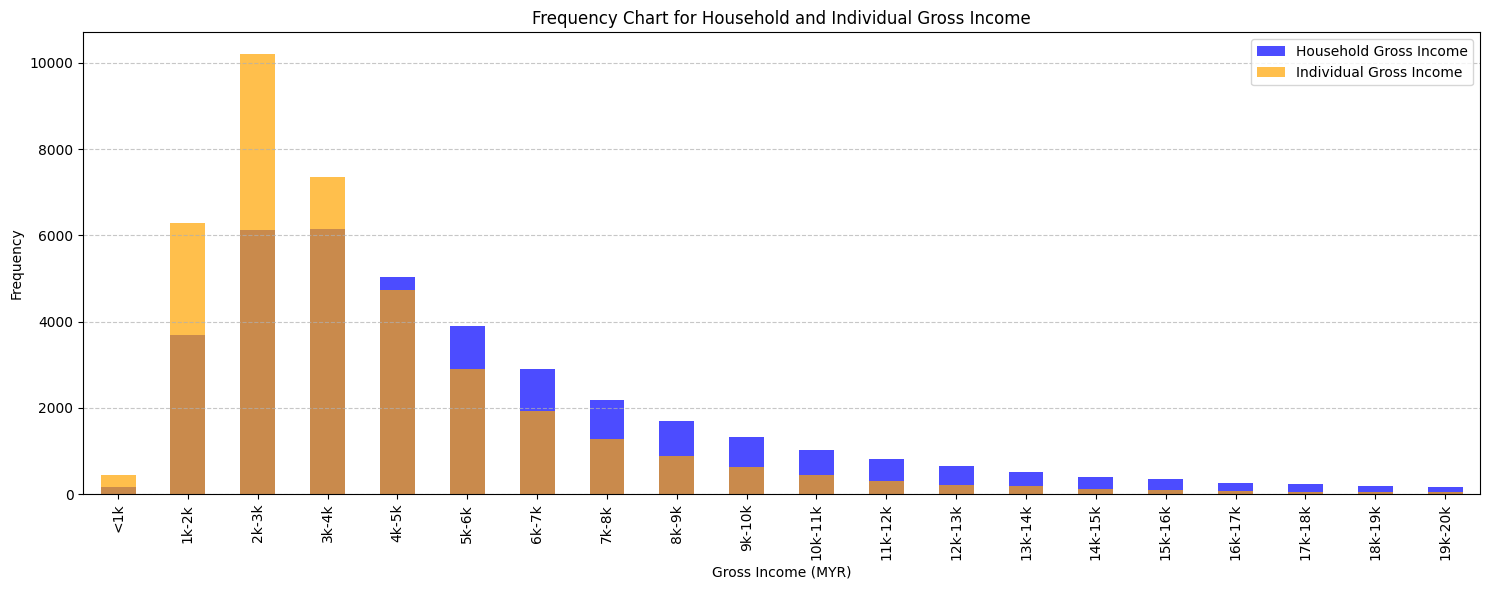

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the maximum value of ginc_hh and ginc_ind for defining the bin range
max_income_hh = int(df2['ginc_hh'].max())  # Convert to integer
max_income_ind = int(df2['ginc_ind'].max())  # Convert to integer

# Create bins with intervals of every 1000 MYR up to 40k
bins = range(0, 21000, 1000)  # Adjusted to go up to 40k

# Categorize 'ginc_hh' and 'ginc_ind' values into bins
df2['ginc_hh_bins'] = pd.cut(df2['ginc_hh'], bins=bins, right=False)
df2['ginc_ind_bins'] = pd.cut(df2['ginc_ind'], bins=bins, right=False)

# Define custom labels
labels = ['<1k'] + [f"{i}k-{i+1}k" for i in range(1, 20)]  # Adjusted labels

# Count the frequency of each bin for ginc_hh and ginc_ind
ginc_hh_freq = df2['ginc_hh_bins'].value_counts().sort_index()
ginc_ind_freq = df2['ginc_ind_bins'].value_counts().sort_index()

# Plot the frequency chart
plt.figure(figsize=(15, 6))

# Plot ginc_hh frequencies
ginc_hh_freq.plot(kind='bar', color='blue', alpha=0.7, label='Household Gross Income')

# Plot ginc_ind frequencies
ginc_ind_freq.plot(kind='bar', color='orange', alpha=0.7, label='Individual Gross Income')

plt.title('Frequency Chart for Household and Individual Gross Income')
plt.xlabel('Gross Income (MYR)')
plt.ylabel('Frequency')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import hashlib
import pandas as pd

data = df2

# Convert data to DataFrame
df = pd.DataFrame(data)

# Function to create pseudoID using hash function
def create_pseudo_id(hid):
    # Using SHA-256 hash function
    hash_object = hashlib.sha256(hid.encode())
    pseudo_id = hash_object.hexdigest()
    return pseudo_id

# Apply the function to create pseudoID for each row
df['pseudoID'] = df['HID'].apply(create_pseudo_id)

# Drop the 'HID' column
df.drop(columns=['HID','ginc_hh_bins','ginc_ind_bins'], inplace=True)

# df.columns = ['HID', 'J', 'U', 'state', 'NGDP', 'strata', 'hh_size', 'ginc_hh', 'ginc_ind','TP']
# Rename headers NGDP to district and TP to status
df = df.rename(columns={"NGDP": "district", "TP": "status"})

# Display the DataFrame with pseudoID
df


,J,U,state,district,strata,hh_size,ginc_hh,ginc_ind,status,pseudoID
0,2,72.0,Perak,Kuala Kangsar,Luar Bandar,1 orang,365.00000,365.00000,3,4e33c477f649687e9fbb9fcceb3afd3d32cdbb50f6f638...
1,1,51.0,Sabah,Kota Belud,Luar Bandar,1 orang,451.16666,451.16666,3,3600fda46edafa00b248883936555ac2a4472105194b82...
2,2,70.0,Perak,Kuala Kangsar,Bandar,1 orang,500.50000,500.50000,3,4d36a86833c586af6368420db942a675479bb7869654fe...
3,2,66.0,Perak,Manjung,Luar Bandar,1 orang,502.16666,502.16666,3,95392222a123a6512edb225d72ec3c4f4d5d0e8578bc1c...
4,1,68.0,Kedah,Kuala Muda,Bandar,1 orang,525.00000,525.00000,3,76c89505a9bf617120b01c582d89382efc27557d671470...
...,...,...,...,...,...,...,...,...,...,...
38408,1,74.0,Selangor,Petaling,Bandar,4 orang,96963.25000,81313.66400,2,5886cc43e4300c6303a8b792d8cd4985da406ae3cdca3f...
38409,1,65.0,Perak,Hulu Perak,Luar Bandar,2 orang,103867.66400,99518.08600,2,6abae77ed9295201dea0d26315436312ac764966db40da...
38410,1,42.0,Selangor,Petaling,Bandar,1 orang,107635.75000,107635.75000,1,b0bf212974f6a92e1b74248cc047a511a4169c6e39ca15...
38411,2,41.0,Johor,Johor Bahru,Bandar,6 orang dan lebih,120887.50000,120887.50000,2,cb325aea0024b892711a2ce055eadf539b318de7993171...


In [ ]:
df.to_csv('hh2022sample_inc.csv')